# Matrix product state circuit simulator convergence

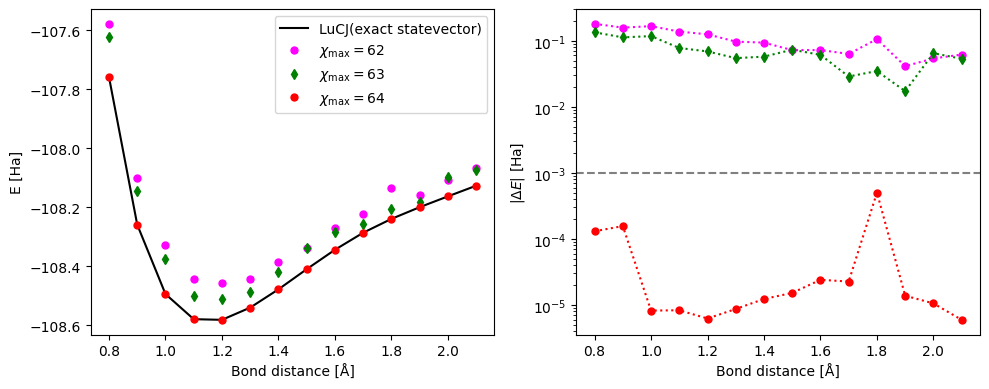

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tikzplotlib


bds = [(62,'o', 'magenta'),(63,'d', 'green'), (64,'o', 'red')]

ground_truth = np.loadtxt("../data/classical/n2_sto-6g.csv",delimiter=',',skiprows=1)
R = ground_truth[:,0][:-3]
E_lucj = ground_truth[:,6][:-3]

fig, axs = plt.subplots(1,2, figsize=(10,4))

axs[0].plot(R,E_lucj, c='k', label="LuCJ(exact statevector)")
for (bd, mk, c) in bds:
    data = np.loadtxt(f"../data/mps/sto-6g/n2_bd={bd}.csv",delimiter=',',skiprows=1)
    R = data[:,0][::2]; E=data[:,1][::2]
    axs[0].plot(R,E, mk,c=c, label=rf"$\chi_\max=${bd} $\,$", markersize=5)
axs[0].set_xlabel(r"Bond distance [Å]"); axs[0].set_ylabel(r"E [Ha]")
for (bd, mk, c) in bds:
    data = np.loadtxt(f"../data/mps/sto-6g/n2_bd={bd}.csv",delimiter=',',skiprows=1)
    R = data[:,0][::2]; E=data[:,1][::2]
    axs[1].semilogy(R, np.abs(E - E_lucj), mk, c=c, label=rf"$\chi=${bd}", markersize=5,ls=':')

axs[0].legend()
axs[1].set_xlabel(r"Bond distance [Å]"); axs[1].set_ylabel(r"$|\Delta E|$ [Ha]")
axs[1].axhline(1E-3, c='gray', ls="--")

plt.tight_layout()

"""
tikzplotlib.save( "figures/N2_sto-6g_MPS.tex", axis_width="0.5\\linewidth", axis_height="0.4\\linewidth", textsize=4, 
                 extra_axis_parameters=[ "tick label style={font=\\scriptsize}", 
                                        "label style={font=\\footnotesize}", 
                                        "title style={font=\\footnotesize}", 
                                        "legend style={font=\\scriptsize}"], 
                                        extra_groupstyle_parameters=[ "horizontal sep=1.75cm" ] )
"""
plt.show()

# Effect of truncation

Average runtime $\bar t$ of the MPS simulation is affected significantly as we decrease truncation. However, the error is also impacted.

/tmp/ipykernel_19525/275820604.py:26: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(eps[0]+0.0005,eps[-1]-0.0005)
/tmp/ipykernel_19525/275820604.py:27: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(dE[-1]-0.005,dE[0]+0.005)


Text(0, 0.5, '$|\\Delta E|$ [Ha]')

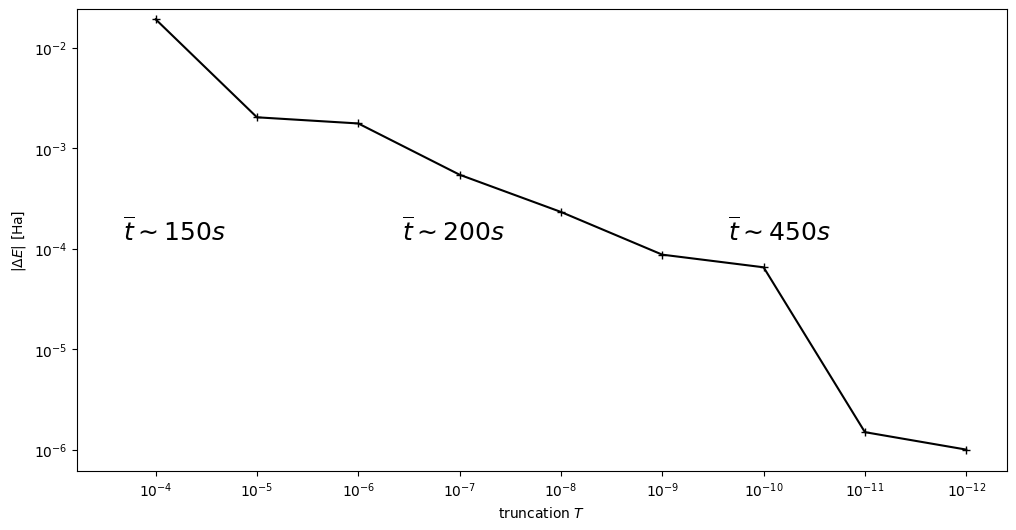

In [5]:
eps = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10,1e-11,1e-12]
energies = [-108.9548529716,-108.9719448445,-108.9722112025,-108.9734252187,-108.9737366011,-108.9738809880,-108.9739028579,-108.9739664644,-108.9739669557]
E_perf = -108.9739679550
dE = [np.abs(E_perf - E) for E in energies]

fig, ax = plt.subplots(figsize=(12,6))
ax.loglog(eps, dE, '-+k')
ax.invert_xaxis()
ax.minorticks_off()

ax.annotate(r"$\overline{t} \sim 150 s$",
            xy=(0.05, 0.5),
            xycoords="axes fraction",
            fontsize=18)

ax.annotate(r"$\overline{t} \sim 200 s$",
            xy=(0.35, 0.5),
            xycoords="axes fraction",
            fontsize=18)

ax.annotate(r"$\overline{t} \sim 450 s$",
            xy=(0.7, 0.5),
            xycoords="axes fraction",
            fontsize=18)

ax.set_xlim(eps[0]+0.0005,eps[-1]-0.0005)
ax.set_ylim(dE[-1]-0.005,dE[0]+0.005)

ax.set_xlabel("truncation $T$")
ax.set_ylabel(r"$|\Delta E|$ [Ha]")

# DMRG sweep algorithm and convergence

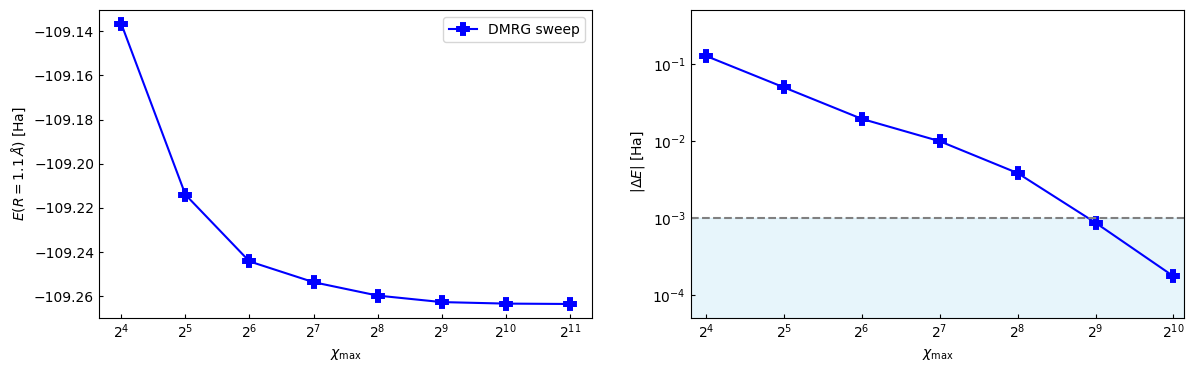

In [23]:

plt.rcParams.update({"lines.markersize":5, "lines.markeredgewidth":10, "xtick.major.size":3, "xtick.minor.size":3, "ytick.major.size":3, "ytick.minor.size":3, "xtick.direction":"in", "ytick.direction":"in"}) 

data = np.loadtxt("../data/dmrg/sweeps/N2_ccpvdz_eq.csv",delimiter=',',skiprows=1)

chi = data[:,0]
E = data[:,1]

e_true = E[-1]
Es = E[:-1]
chis = chi[:-1]

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,4))

ax1.plot(chi, E, '-+', c="b", label="DMRG sweep")
ax1.set_xscale('log', base=2)
ax1.set_xlabel(r"$\chi_\max$")
ax1.set_ylabel(r"$E(R=1.1 \, Å)$ [Ha]")

ax2.semilogy(chis, np.abs(Es-e_true), '-+', c='b')
ax2.axhline(1e-3, ls='--', c='gray')
ax2.set_ylabel(r" $|\Delta E|$ [Ha]")
ax2.set_xlabel(r"$\chi_\max$")
ax2.set_xscale('log', base=2)
ax1.legend()
ax2.minorticks_off()
ax2.set_xlim(2**4-2,2**10+100)
ax2.set_ylim(5e-5,5e-1)
ax2.fill_between(np.arange(2**4-2,2**10+100), 1e-5, 1e-3, color='skyblue', alpha=0.2)


tikzplotlib.save( "figures/N2_dmrg_ccpvdz.tex", axis_width="0.5\\linewidth", axis_height="0.4\\linewidth", textsize=6, extra_axis_parameters=[ "mark options={scale=5, line width=15}, tick label style={font=\\scriptsize}", "label style={font=\\footnotesize}", "title style={font=\\footnotesize}", "legend style={font=\\scriptsize}", ], extra_groupstyle_parameters=[ "horizontal sep=1.75cm" ] )

plt.show()